<a href="https://colab.research.google.com/github/Kimjibeom/Python_Example/blob/main/Fashion_MNIST_0_9_%EC%9D%98%EB%A5%98_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10가지의 의류(0~9)를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(X_train, y_train), (X_test, y_test) = load_data()

In [2]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

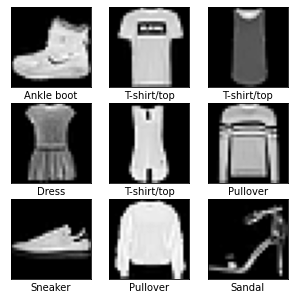

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


전처리 및 검증 데이터셋 만들기

In [4]:
# 값의 범위를 0~1 사이로 만들기 -> 스케일링 -> minmax 알고리즘

X_train = X_train / 255
X_test = X_test / 255

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0~9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                  test_size=0.3,
                                                  random_state=777)

첫 번째 모델 구성하기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28))) #Flatten(28, 28)함수 -> (28 * 28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

첫 번째 모델 설정하기

In [8]:
first_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

첫 번째 모델 학습시키기

In [9]:
first_history = first_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data =(X_val, y_val)
                    )

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.6662 - accuracy: 0.7761 - val_loss: 0.4908 - val_accuracy: 0.8273
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.8443 - val_loss: 0.4188 - val_accuracy: 0.8532
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8565 - val_loss: 0.4104 - val_accuracy: 0.8555
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3839 - accuracy: 0.8647 - val_loss: 0.3699 - val_accuracy: 0.8713
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.8706 - val_loss: 0.3773 - val_accuracy: 0.8683
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8760 - val_loss: 0.3860 - val_accuracy: 0.8593
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8787 - val_loss: 0.3549 - val_accuracy: 0.8767
Epoch 

두 번째 모델 구성하기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape=(28,28))) #Flatten(28, 28)함수 -> (28 * 28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 128개의 출력을 가지는 Dense 층을 추가합니다. <- 기존 모델보다 층 하나 더 추가 
second_model.add(Dense(64, activation='relu')) # 64개의 출력을 가지는 Dense 층을 추
second_model.add(Dense(32, activation='relu')) # 32개의 출력을 가지는 Dense 층을 추
second_model.add(Dense(10, activation='softmax')) # 10개의 출력을 가지는 Dense 층을 추

second_model.compile(loss='categorical_crossentropy', # 손실 함수: categorical_crossentropy
              optimizer='adam', # 옵티마이저 : Adam
              metrics=['accuracy']) # 모니터링 할 평가지표: accuracy(정확도)

second_history = second_model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data =(X_val, y_val)
                    )

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6535 - accuracy: 0.7755 - val_loss: 0.4438 - val_accuracy: 0.8476
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4293 - accuracy: 0.8483 - val_loss: 0.4267 - val_accuracy: 0.8508
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.8633 - val_loss: 0.3644 - val_accuracy: 0.8709
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3484 - accuracy: 0.8741 - val_loss: 0.3452 - val_accuracy: 0.8809
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3286 - accuracy: 0.8799 - val_loss: 0.3581 - val_accuracy: 0.8676
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3138 - accuracy: 0.8855 - val_loss: 0.3408 - val_accuracy: 0.8783
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2966 - accuracy: 0.8910 - val_loss: 0.3663 - val_accuracy: 0.8724
Epoch 

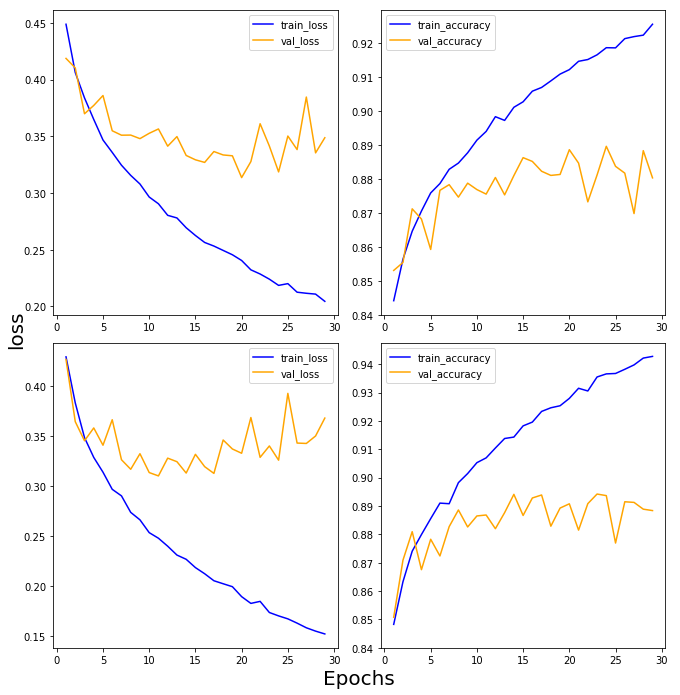

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

모델 평가하기

In [13]:
print(first_model.evaluate(X_test,y_test))
print(second_model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8709
[0.3920603096485138, 0.8708999752998352]
313/313 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8750
[0.4248136281967163, 0.875]


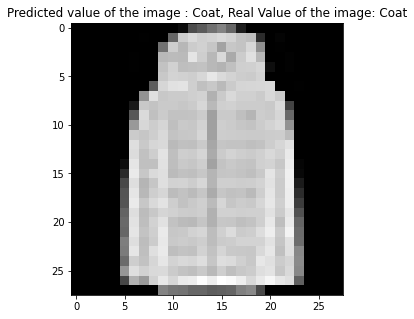

In [33]:
import numpy as np

results = first_model.predict(X_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(X_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()